# Analysis of Princeton Instruments Lightfield 3.0 Software

This notebook is to analyze spe files. Package to use 3.x Princeton Instruments SPE files is here: https://pypi.org/project/spe2py/#description and https://github.com/ashirsch/spe2py and this can be installed with "pip install spe2py". Make sure you have the right python version (3.11) and are using a virtual environment with that interpreter.

In [1]:
# Imports and initializaion
import numpy as np
import matplotlib.pyplot as plt
import spe_loader as sl
import scipy as sp
import scipy.constants as sc
from spefile3 import *
import glob
from scipy.stats import norm
import os
import pandas as pd
from spefile3 import speFile3

Successfully loaded 1 file(s) in a SpeFile object
[561.59669682 561.6842127  561.77172796 ... 677.99036909 678.07691024
 678.16345053]
[[array([[ 8., 12., 15., ...,  5.,  4.,  6.]], dtype=float32)], [array([[24.,  6., 18., ..., 12.,  2.,  8.]], dtype=float32)], [array([[26., 17.,  7., ..., 16., 10., 15.]], dtype=float32)], [array([[19.,  9.,  4., ..., 18., -6., -2.]], dtype=float32)], [array([[25.,  9.,  3., ..., 15., -5.,  4.]], dtype=float32)], [array([[10., 13., 10., ..., 15., 10.,  6.]], dtype=float32)]]
60.0


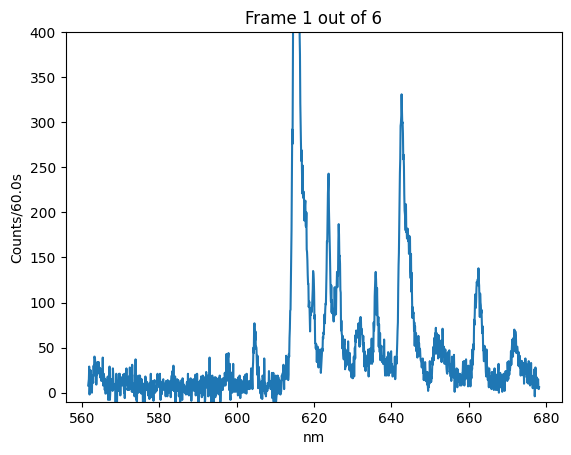

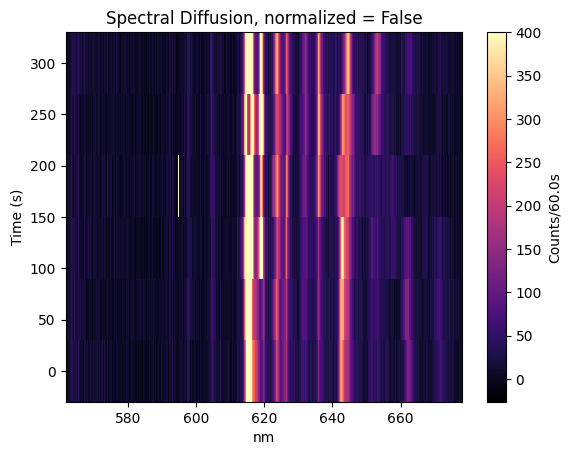

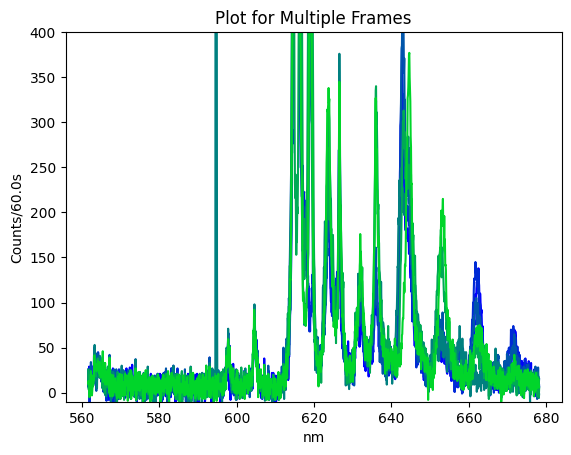

In [2]:
filename = '2024/2024_05_16/doped1e5/8/doped_60sec_10uWpulsed 2024 May 16 20_43_18 52.spe'
s = speFile3(filename)
print(s.wavelengths)
print(s.data)
print(s.exposure)
maxss = 400
s.quickPlot(frame = 0, ylim= maxss)
s.specDiffusionPlot(maxs = maxss, units = 'nm')
#sumFrames(s, 0, s.numFrames, units = 'nm', max = None)
#s.gaussFit(frame = 0, units='eV')
s.plotFramesColor(ylim=(-10,maxss))

def sumDataInRange(spe_file, start_wavelength, end_wavelength, frame):
    start_index = np.where(spe_file.wavelengths >= start_wavelength)[0][0]
    end_index = np.where(spe_file.wavelengths <= end_wavelength)[0][-1]
    return np.sum(spe_file.data[frame][0][0][int(start_index):int(end_index+1)])/s.exposure
    #return np.sum(spe_file.data[:, 0, 0][:, start_index:end_index+1], axis=1)



IntSlider(value=0, continuous_update=False, description='Frame:', max=5)

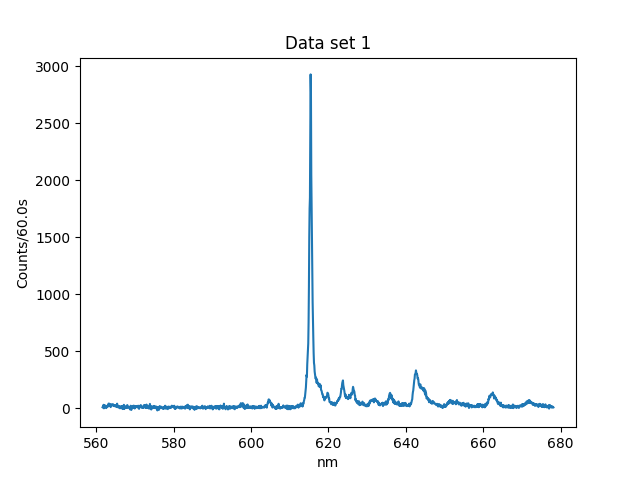

In [3]:
# this block just makes a widget so to loop through frames
%matplotlib widget
s.interactivePlot(units = 'nm')

In [178]:
# for 1 in 02/24/2024
# r11, r22, r33, r44 = [853.955, 951.9266666666666, 1118.68, 1026.4433333333334, 1246.4866666666667, 1666.72, 3009.5333333333333, 2988.2166666666667, 3180.95, 3225.016666666667, 3284.133333333333, 3235.5833333333335, 5405.1, 14401.4, 14361.5, 14375.0, 13733.8, 134301.0, 15518.9, 15769.4, 16177.5, 16605.0, 17574.8, 17290.7, 15625.2, 16311.0, 17200.9, 17000.6, 17486.6, 17642.1] [950.399, 1033.655, 1119.1866666666667, 1086.4116666666666, 1312.52, 1698.7066666666667, 2997.116666666667, 3053.0666666666666, 3171.016666666667, 3248.95, 3255.55, 3184.3333333333335, 5394.933333333333, 14334.2, 14403.1, 14453.4, 13887.0, 134856.0, 15172.6, 15336.5, 15595.9, 15824.3, 16040.8, 16624.6, 16086.5, 17596.3, 18080.6, 17452.2, 18512.0, 20194.3] [818.942, 894.275, 1091.5966666666666, 937.6583333333333, 1136.1833333333334, 1550.8866666666668, 2866.4166666666665, 2873.616666666667, 2984.633333333333, 2981.616666666667, 2975.25, 2952.9666666666667, 5171.666666666667, 14186.6, 14269.9, 14292.5, 13859.2, 135571.0, 14767.0, 14921.1, 15264.3, 15015.7, 15112.0, 15372.9, 15016.7, 15641.9, 15599.6, 15703.4, 16091.5, 16487.4] [2623.296, 2879.8566666666666, 3329.463333333333, 3050.5133333333333, 3695.19, 4916.3133333333335, 8873.066666666668, 8914.9, 9336.6, 9455.583333333334, 9514.933333333332, 9372.883333333333, 15971.7, 42922.2, 43034.5, 43120.9, 41480.0, 404728.0, 45458.5, 46027.0, 47037.7, 47445.0, 48727.6, 49288.2, 46728.4, 49549.2, 50881.1, 50156.2, 52090.1, 54323.8]
# need to delete the 17th element b/c mislabeled

[853.955, 951.9266666666666, 1118.68, 1026.4433333333334, 1246.4866666666667, 1666.72, 3009.5333333333333, 2988.2166666666667, 3180.95, 3225.016666666667, 3284.133333333333, 3235.5833333333335, 5405.1, 14401.4, 14361.5, 14375.0, 13733.8, 134301.0, 15518.9, 15769.4, 16177.5, 16605.0, 17574.8, 17290.7, 15625.2, 16311.0, 17200.9, 17000.6, 17486.6, 17642.1] [950.399, 1033.655, 1119.1866666666667, 1086.4116666666666, 1312.52, 1698.7066666666667, 2997.116666666667, 3053.0666666666666, 3171.016666666667, 3248.95, 3255.55, 3184.3333333333335, 5394.933333333333, 14334.2, 14403.1, 14453.4, 13887.0, 134856.0, 15172.6, 15336.5, 15595.9, 15824.3, 16040.8, 16624.6, 16086.5, 17596.3, 18080.6, 17452.2, 18512.0, 20194.3] [818.942, 894.275, 1091.5966666666666, 937.6583333333333, 1136.1833333333334, 1550.8866666666668, 2866.4166666666665, 2873.616666666667, 2984.633333333333, 2981.616666666667, 2975.25, 2952.9666666666667, 5171.666666666667, 14186.6, 14269.9, 14292.5, 13859.2, 135571.0, 14767.0, 14921.1,

In [179]:
power = [0.36, 0.76, 1.55, 1.61, 2.37, 3.43, 4.54,5.05,5.65,  6.2, 6.5, 7.1,8,8.5, 9.7,10.3, 12.18, 21.6, 35.8,  43, 53, 65, 90, 100,120, 230, 290, 340, 450,620 ]

In [214]:
def div2(arr):
    for i in range(len(arr)):
        if i > 12:
            arr[i] = arr[i]/2
    return arr
# have to divide by 2 for each after 8.5uW since the collection time was wierdout


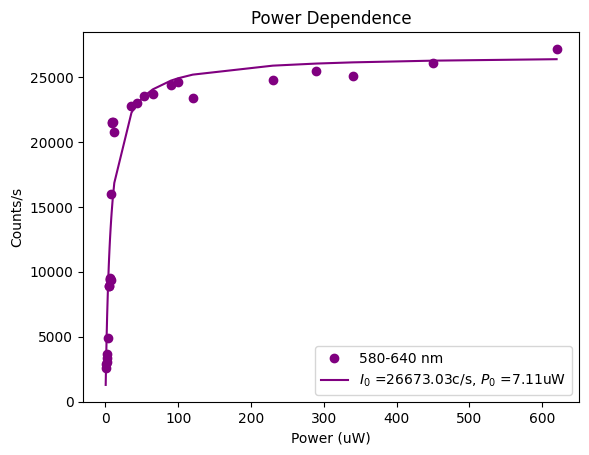

In [224]:
def func(x, a, b):
    return a*(x/(x+b))
paramr1, _ = curve_fit(func, power, r11, p0 = [6000, 6000])
paramr2, _ = curve_fit(func, power, r22, p0 = [6000, 6000])
paramr3, _ = curve_fit(func, power, r33, p0 = [6000, 6000])
paramr4, _ = curve_fit(func, power, r44, p0 = [6000, 6000])

fit_yr1 = func(power, paramr1[0], paramr1[1])
fit_yr2 = func(power, paramr2[0], paramr2[1])
fit_yr3 = func(power, paramr3[0], paramr3[1])
fit_yr4 = func(power, paramr4[0], paramr4[1])

# plt.plot(power, r11, 'o',color = 'red',  label = '580-600 nm')
# plt.plot(power, r22, 'o',color = 'blue', label = '600-620 nm')
# plt.plot(power, r33, 'o', color = 'green', label = '620-640 nm')
plt.plot(power, r44, 'o', color = 'purple', label = '580-640 nm')
# plt.plot(power, fit_yr1,color = 'red',  label = '$I_0$ =' + str(round(paramr1[0], 2)) + 'c/s, $P_0$ =' + str(round(paramr1[1], 2)) + 'uW')
# plt.plot(power, fit_yr2,color = 'blue', label = '$I_0$ =' + str(round(paramr2[0], 2)) + 'c/s, $P_0$ =' + str(round(paramr2[1], 2)) + 'uW')
# plt.plot(power, fit_yr3,color = 'green', label = '$I_0$ =' + str(round(paramr3[0], 2)) + 'c/s, $P_0$ =' + str(round(paramr3[1], 2)) + 'uW')
plt.plot(power, fit_yr4, color = 'purple', label = '$I_0$ =' + str(round(paramr4[0], 2)) + 'c/s, $P_0$ =' + str(round(paramr4[1], 2)) + 'uW')

plt.xlabel('Power (uW)')
plt.ylabel("Counts/s")
plt.title("Power Dependence")
plt.legend(loc = 'best')

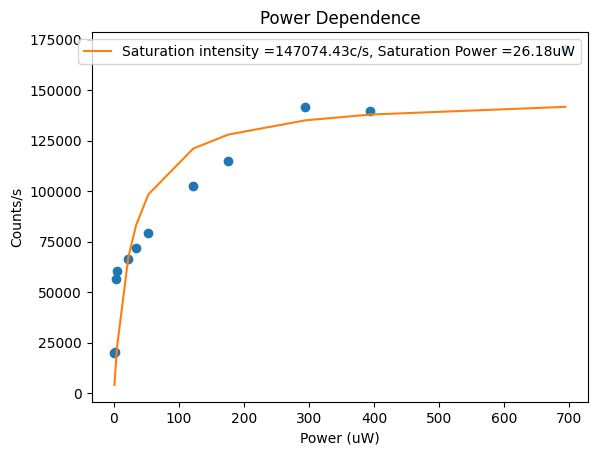

In [33]:
# 01242024 2 
power = [0.75, 1.25, 3.2,5, 22.2, 34,53, 122, 176, 294, 394, 694 ] #in uW
cts = [19955.1, 20380.2, 56696,60253.1, 66331, 71894.9, 79183.7,102318, 114990,141573, 139572,170399  ] # cts/sec
def func(x, a, b):
    return a*(x/(x+b))
param, _ = curve_fit(func, power, cts, p0 = [6000, 6000])

fit_y = func(power, param[0], param[1])
plt.plot(power, cts, 'o')
plt.plot(power, fit_y, label = 'Saturation intensity =' + str(round(param[0], 2)) + 'c/s, Saturation Power =' + str(round(param[1], 2)) + 'uW')
plt.xlabel('Power (uW)')
plt.ylabel("Counts/s")
plt.title("Power Dependence")
plt.legend(loc = 'best')

Text(0, 0.5, 'FWHM (nm)')

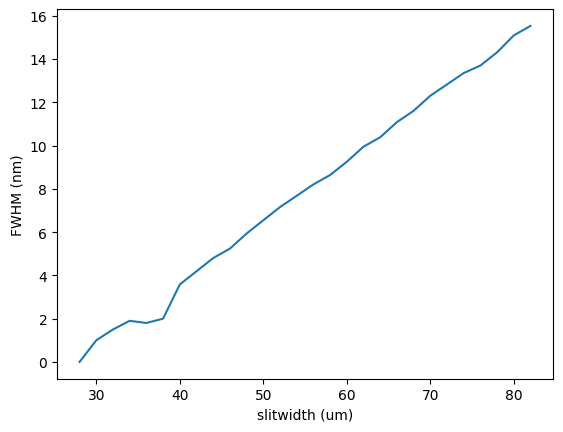

In [3]:
slitwidth = [28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56,58,60,62,64,66,68,70,72,74,76,78,80,82]
fwhm = [0, 1, 1.5, 1.9, 1.8, 2, 582.725-579.146, 583.336-579.146, 583.947-579.146, 584.383-579.146, 585.082-579.146, 585.693-579.146, 586.303-579.146, 586.827-579.146, 587.351-579.146, 587.787-579.146, 588.398-579.146, 589.096-579.146, 589.532-579.146, 590.230-579.146, 590.754-579.146, 591.452-579.146, 591.975-579.146, 592.499-579.146, 592.848-579.146, 593.458-579.146, 594.243-579.146, 594.680-579.146]
plt.plot(slitwidth, fwhm)
plt.xlabel('slitwidth (um)')
plt.ylabel('FWHM (nm)')

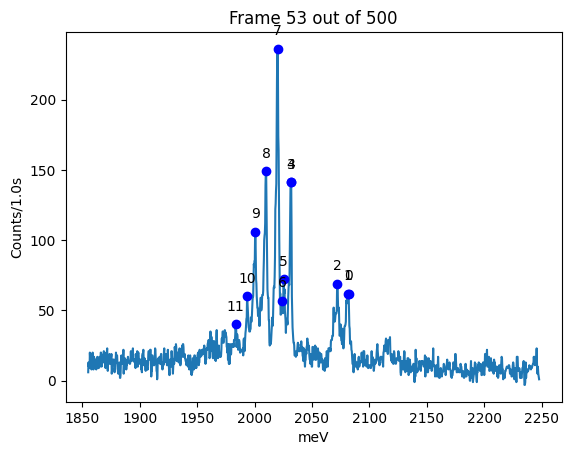

Splittings between peaks are in meV: [ -0.91463815  -8.79960894 -40.27841557  -0.58045889  -6.0745147
  -1.15286291  -4.02452608  -9.99043177  -9.32787161  -7.28738618
 -10.00143158]


In [5]:
# this block finds and labels the peaks and calculates the splittings
from scipy.signal import find_peaks
frame = 52
datt = s.data[frame][0][0]
peaks, _  = find_peaks(datt, height = 40, width = 3.5) 
peakeV,_,_ = s.unitConversion(s.wavelengths[peaks], 'meV')
xaxis, xlab, _ = s.unitConversion(s.wavelengths, units = 'meV')
plt.plot(xaxis, s.data[frame][0][0])
plt.xlabel(xlab)
plt.ylabel("Counts/"+str(s.exposure)+"s")
plt.title("Frame " + str(frame+1) + " out of " + str(s.numFrames))
plt.plot(peakeV, datt[peaks],"ob")
i=0
for x,y in zip(peakeV,datt[peaks]):
    plt.annotate(i, (x,y), textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)
    i = i+1
plt.show()
print('Splittings between peaks are in meV: %s' % np.diff(peakeV))

IntSlider(value=0, continuous_update=False, description='Frame:', max=37)

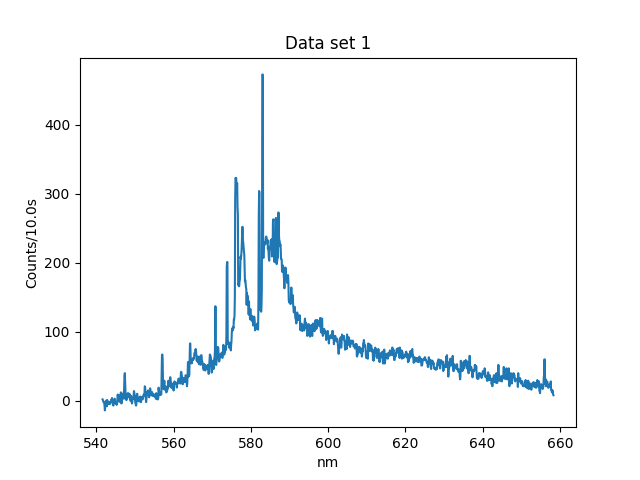

In [3]:
# this block just makes a widget so to loop through frames
%matplotlib widget
s.interactivePlot(units = 'nm')

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


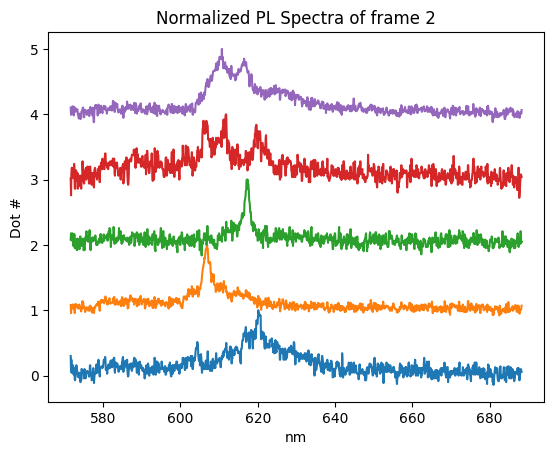

In [34]:
# waterfall plot for all dots in a folder divided by folders listed by numbers. This should be for differnt dots
# becausse it doesn't sort the files
import pandas as pd

filepath = '/Users/tommtommbom/Desktop/UW Research/Kai Mei/CdSeSpecData/06_28_2023/3uW' 
globFiles = glob.glob(filepath+'/*/*[!raw].spe') # remove all raws

df = pd.DataFrame()
j = True 
num = 0
frame = 2
for i in globFiles:
    s = speFile3(i)
    if j:
        j = False
        df ['nm'] = s.wavelengths
    df['dot'+str(num)] = s.data[frame][0][0]/max(s.data[frame][0][0])
    num = num+1


offset=0
for c in df.columns[1:]:
    plt.plot(s.wavelengths,df[c]+offset)
    offset+=1
    # plt.xlim([1325,1375])

plt.xlabel('nm')
plt.ylabel('Dot #')
plt.title("Normalized PL Spectra of frame " + str(frame))
plt.show()


Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
619.3931178924906
11.843857606954863


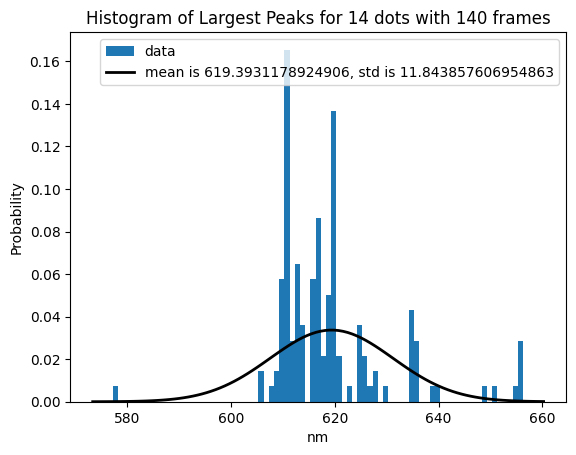

In [33]:
# looking at all dots on PS sample. Made sure to only take one spectra for each dot so exclude different powers
# the powers vary however


filepath = '/Users/tommtommbom/Desktop/UW Research/Kai Mei/CdSeSpecData/06_28_2023/6uW' 
dotFiles = glob.glob(filepath+'/*/*[!raw].spe') # remove all raws
numDots = len(dotFiles)

maxs = []
for i in dotFiles:
    s = speFile3(i)
    for j in range(s.numFrames):
        maxs.append(s.wavelengths[np.argmax(s.data[j][0][0])])

mu, std = norm.fit(maxs) 
print(mu)
print(std)
plt.hist(maxs, bins = np.arange(min(maxs), max(maxs), 1),density=True, label = 'data')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, label = 'mean is '+ str(mu) + ", std is " + str(std))
  

plt.xlabel('nm')
plt.ylabel('Probability')
plt.title("Histogram of Largest Peaks for " + str(numDots)+" dots with " + str(len(maxs)) + " frames")
plt.legend()
plt.show()


Successfully loaded 1 file(s) in a SpeFile object


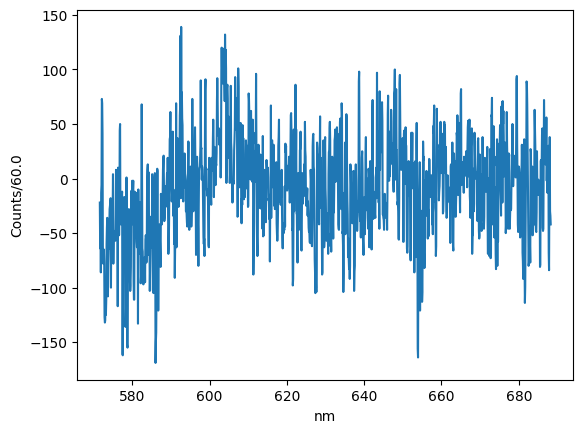

Successfully loaded 1 file(s) in a SpeFile object


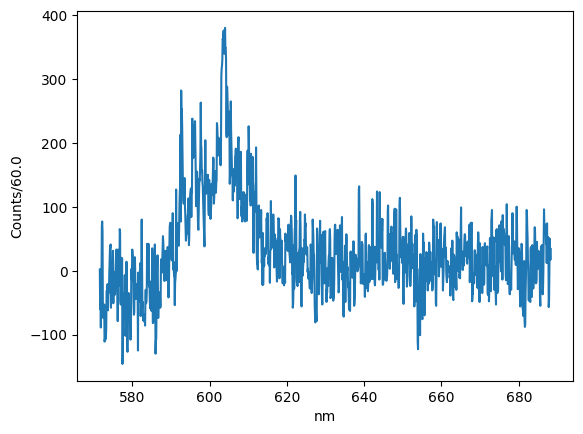

Successfully loaded 1 file(s) in a SpeFile object


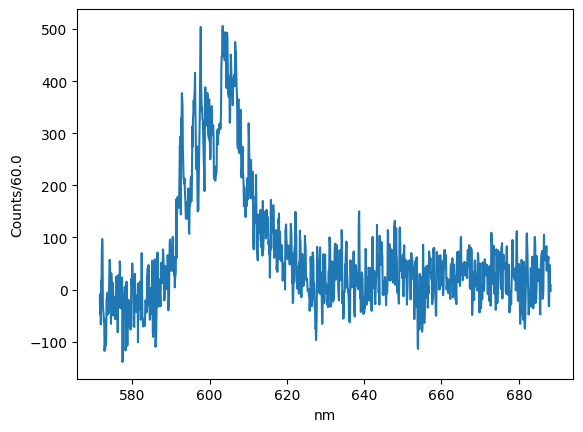

Successfully loaded 1 file(s) in a SpeFile object


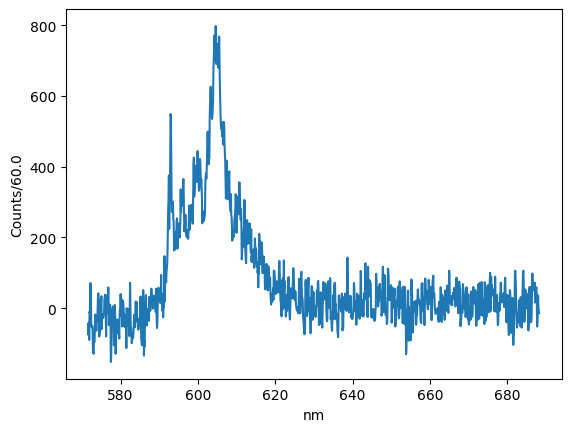

Successfully loaded 1 file(s) in a SpeFile object


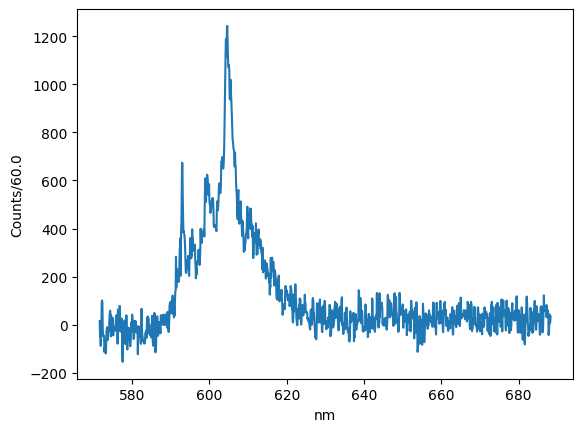

Successfully loaded 1 file(s) in a SpeFile object


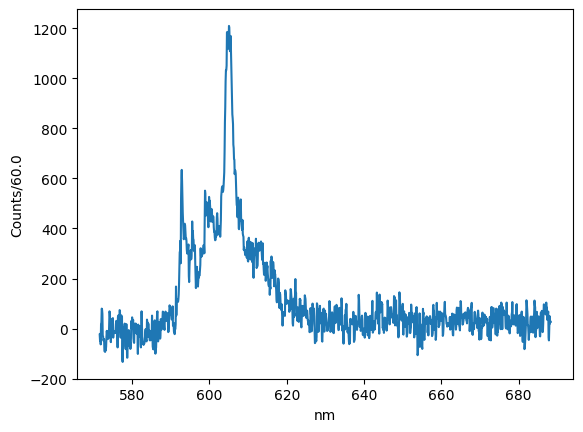

Successfully loaded 1 file(s) in a SpeFile object


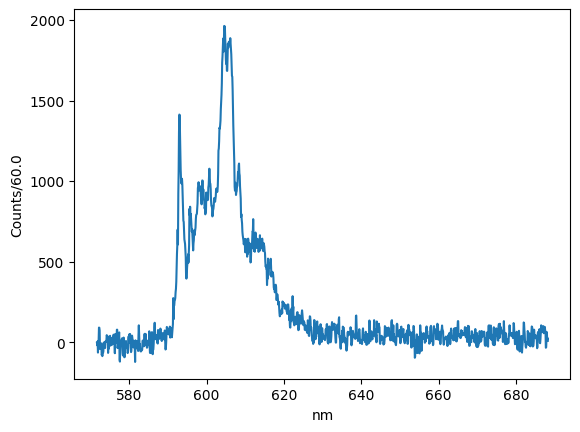

Successfully loaded 1 file(s) in a SpeFile object


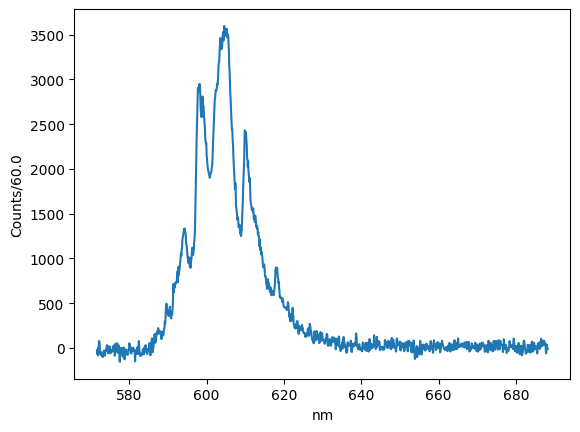

Successfully loaded 1 file(s) in a SpeFile object


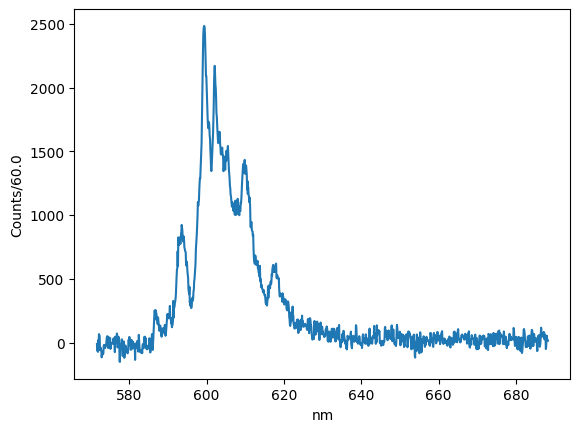

Successfully loaded 1 file(s) in a SpeFile object


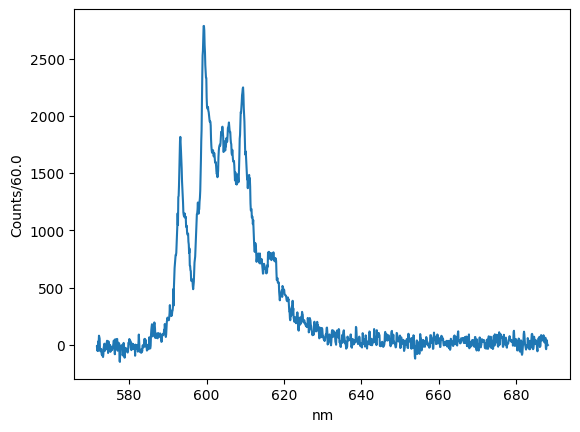

Successfully loaded 1 file(s) in a SpeFile object


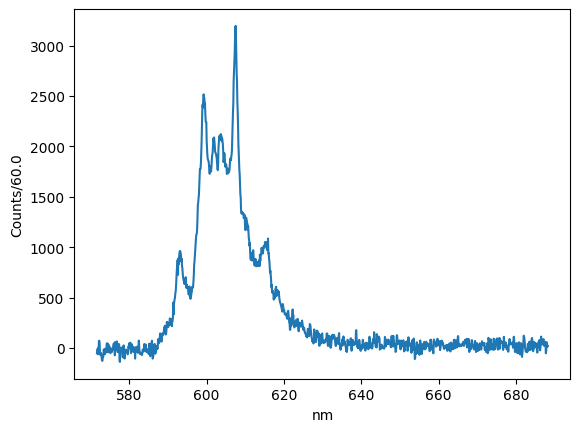

Successfully loaded 1 file(s) in a SpeFile object


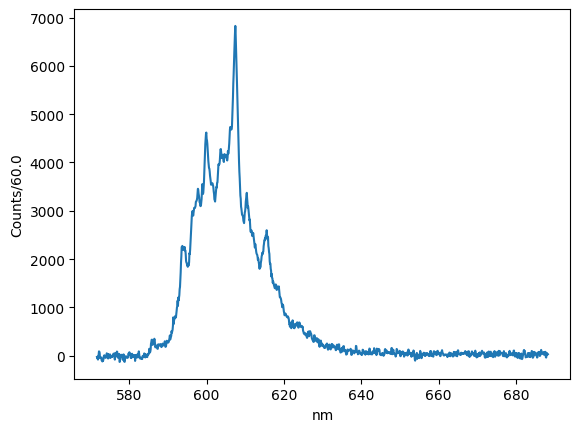

Successfully loaded 1 file(s) in a SpeFile object


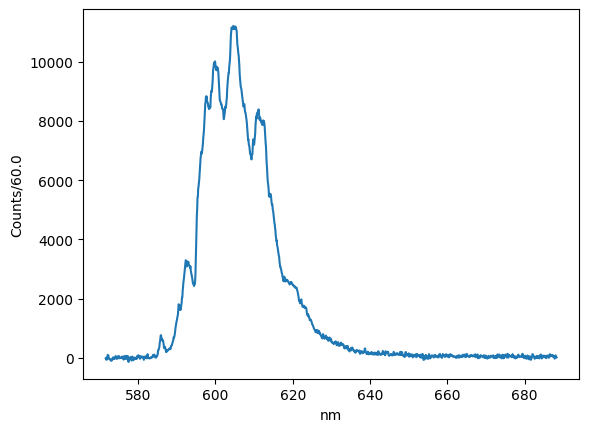

Successfully loaded 1 file(s) in a SpeFile object


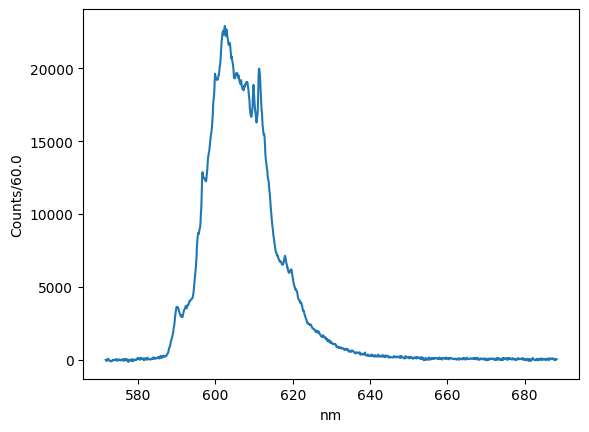

Successfully loaded 1 file(s) in a SpeFile object


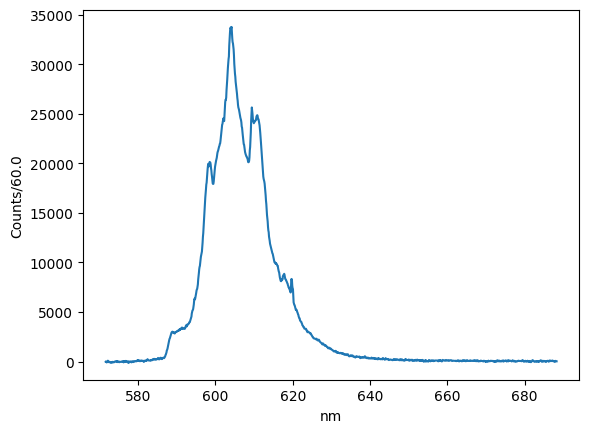

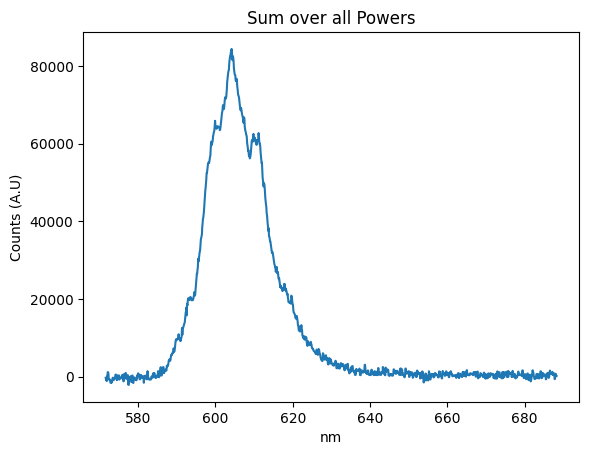

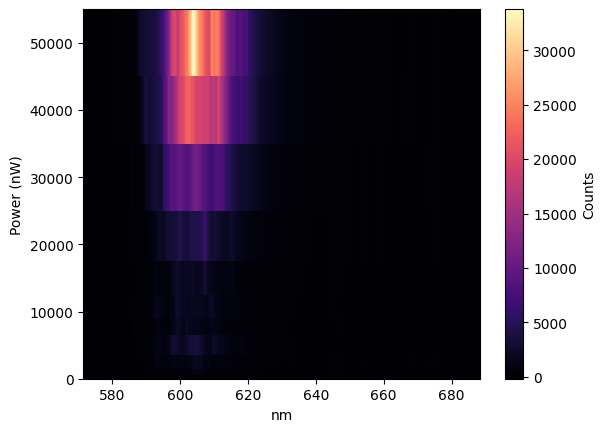

In [16]:
# sum plots by summing over all frames and then over all powers

import glob
filepath = '/Users/tommtommbom/Desktop/UW Research/Kai Mei/CdSeSpecData/05_17_2023/14'
powerFiles = glob.glob(filepath+'/*/*[!raw].spe') # remove all raws
powerFiles.sort(key=lambda x: x.split('May')[1]) # this is a quick fix to sort based on power


# summing over all powers
totalsum = np.zeros(1340)
# spectral diffusion over all powers
totalSpec = []
for i in powerFiles:
    sclass = speFile3(i)

    # summing over all frames
    frameSum = np.zeros(1340)
    # for each frame
    for j in range(sclass.numFrames):
        frameSum += sclass.data[j][0][0]

    totalSpec.append(frameSum)
    totalsum += frameSum

    plt.plot(sclass.wavelengths, frameSum)
    plt.xlabel('nm')
    plt.ylabel('Counts/'+str(sclass.exposure*sclass.numFrames))
    plt.show()

plt.plot(sclass.wavelengths, totalsum)
plt.xlabel('nm')
plt.ylabel('Counts (A.U)')
plt.title('Sum over all Powers')
plt.show()

# spectral diffusion for different powers
x = [sclass.wavelengths]*10
times = [100, 300, 500, 700, 900, 1000, 2000, 5000, 8000, 10000, 15000, 20000, 30000, 40000, 50000]
plt.pcolormesh(sclass.wavelengths,times, totalSpec, cmap="magma", vmax = None)
plt.colorbar(label = "Counts")
plt.xlabel('nm')
plt.ylabel('Power (nW)')
plt.show()

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


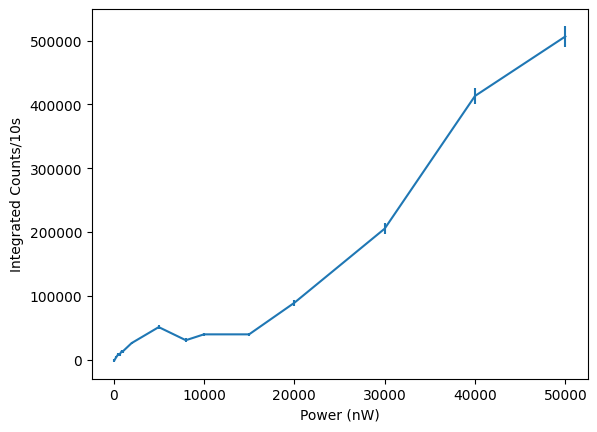

In [17]:
# power dependence plots by integrating the whole spectra and taking the mean over all the frames for each power

import glob
filepath = '/Users/tommtommbom/Desktop/UW Research/Kai Mei/CdSeSpecData/05_17_2023/14'
powerFiles = glob.glob(filepath+'/*/*[!raw].spe') # remove all raws
powerFiles.sort(key=lambda x: x.split('May')[1]) # this is a quick fix to sort based on power

means = []
stds = []
powers = [100, 300, 500, 700, 900, 1000, 2000, 5000, 8000, 10000, 15000, 20000, 30000, 40000, 50000]
for i in powerFiles:
    sclass = speFile3(i)

    frame_data = []
    # for each frame
    for j in range(sclass.numFrames):
        frame_data.append(sum(sclass.data[j][0][0]))
    means.append(np.mean(frame_data))
    stds.append(np.std(frame_data))

    #sclass.specDiffusionPlot(maxs = None)

plt.errorbar(powers, means, stds)
plt.xlabel("Power (nW)")
plt.ylabel("Integrated Counts/5s")
plt.show()

In [4]:
# FOR MULTI FILE PROCESSING
# Iterate over all files in directory specified by file path. Doesn't use raw files
import os

def getNonRawFiles(filepath):
    listFiles = {}
    for filename in os.listdir(filepath):
        f = os.path.join(filepath, filename)
        # checking if it is a file
        if os.path.isfile(f):
            ss = re.search('.spe', f)
            if ss != None and f[ss.span()[0] -1] != 'w': # don't look at raw files and files without spe tag
                sp = f.split(' ')
                listFiles[int(sp[-1].split('.')[0])] = f # sort files based on ordering in the name
    myKeys = list(listFiles.keys())
    myKeys.sort()
    sorted_dict = {i: listFiles[i] for i in myKeys}
    return sorted_dict

# create a heat map given a dictionary of files and the frames in the files
# maxs is the max value for the color plot
def specDiffusionPLot(sorted_dict, units = None, maxs = None):
    y = []
    x = [] 
    for key,value in sorted_dict.items():
        s = speFile3(value)
        print(s.filepath)
        for i in range(s.numFrames):
            x.append(s.wavelengths)
            y.append(s.data[i][0][0])
    if units != None: # change to eV
            x = [h*c/ (i * 1e-9) / eV for i in x]
            xlab = "eV"
    else: # stay in nm
        xlab = 'nm'
    times = np.arange(len(x)) * s.exposure
    plt.pcolormesh(x,times, y, cmap="magma", vmax = maxs)
    plt.colorbar(label = "Counts/" + str(s.exposure)+'s')
    plt.xlabel(xlab)
    plt.ylabel("Time (s)")
    plt.show()

# Summs up all the files to get a total exposure time. Takes in a dictionary of file names
def sumFiles(dic, units = None):
    newdic = {}
    totalExposure = 0
    for key,val in dic.items():
        spe3dat = speFile3(val)
        x = spe3dat.wavelengths
        y = spe3dat.data
        totalExposure += spe3dat.numFrames * spe3dat.exposure

        for i in range(len(x)):
            keyy = x[i]
            for j in range(spe3dat.numFrames):
                if keyy not in newdic:
                    newdic[keyy] = y[j][0][0][i]
                else:
                    old = newdic[keyy] 
                    newdic[keyy] = old + y[j][0][0][i]

    waves = list(newdic.keys())
    dat = list(newdic.values())
    if units != None:
        xaxis = [h*c / (i * 1e-9) / eV for i in waves]
        xlab = "eV"
    else:
        xaxis = waves
        xlab = 'nm'
    plt.plot(xaxis, dat)
    plt.xlabel(xlab)
    plt.ylabel("Counts/"+str(totalExposure)+"s")
    plt.show()


In [10]:
filepath = '/Users/tommtommbom/Desktop/UW Research/Kai Mei/CdSeSpecData/05_05_2023/1uW_30_ps 2023 May 08 10_31_53 1.spe'
dic = getNonRawFiles(filepath)
# delete = [key for key in dic if key <= 5]
# for key in delete:
#     del dic[key]
specDiffusionPLot(dic, maxs = 1000)
sumFiles(dic)

AttributeError: 'set' object has no attribute 'items'